In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC

In [8]:
x = np.array([[1,1],[2,1],[1,2],[1.5,1.5],[3,4],[2,5],[4,3],[7,2],[3,5],[2,6],[6,2],[3,4],[4,4]])
y = [0,1,0,0,1,1,1,1,1,1,1,1,1]

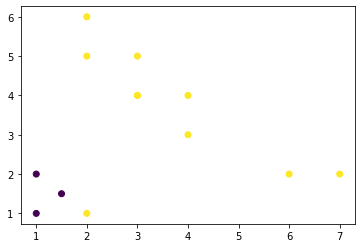

In [9]:
X_x1 = x[:,0]
X_x2 = x[:,1]
plt.scatter(X_x1,X_x2,c = y)
plt.show()

In [22]:
svcLinear = SVC(kernel = "linear",C=100).fit(x,y)
svcLinear.coef_,svcLinear.intercept_

(array([[3.99804688e+00, 4.44089210e-16]]), array([-6.99633789]))

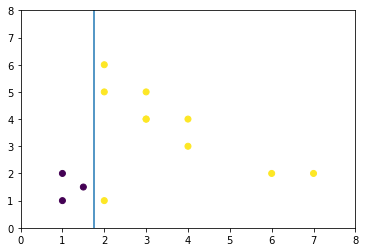

In [23]:
x1 = np.array([0,5])
x2 = -1*(svcLinear.intercept_ + svcLinear.coef_[0][0]*x1)/svcLinear.coef_[0][1]
plt.plot(x1,x2)
plt.scatter(X_x1,X_x2,c=y)
plt.axis([0,8,0,8])
plt.show()

In [24]:
from sklearn import datasets,svm
from sklearn.model_selection import train_test_split

In [30]:
iris = datasets.load_iris()
X = iris.data[:,0:2]
Y = iris.target

In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 42)

In [65]:
clf = svm.SVC(C = 100,gamma = "auto")
clf.fit(X_train,Y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [66]:
clf.score(X_test,Y_test)

0.8157894736842105

In [63]:
def makegrid(x1,x2,h=0.02):
    x1_min,x1_max = x1.min()-1,x1.max()+1
    x2_min,x2_max = x2.min()-1,x2.max()+1
    a = np.arange(x1_min,x1_max,h)
    b = np.arange(x2_min,x2_max,h)
    xx,yy = np.meshgrid(a,b)
    return xx,yy

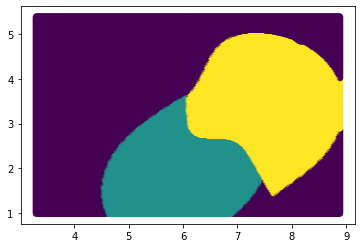

In [67]:
xx,yy = makegrid(X[:,0],X[:,1])
predictions = clf.predict(np.c_[xx.ravel(),yy.ravel()])
plt.scatter(xx.ravel(),yy.ravel(),c = predictions)
plt.show()

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
clf = svm.SVC()
grid = {"C" : [1,10,1e2,1e3,5e3,1e4,5e4,1e5],
       "gamma" : [1e-1,1e-2,1e-3,1e-4,5e-4,5e-3]}
abc = GridSearchCV(clf,grid)
abc.fit(X_train,Y_train)

c:\users\himanshu\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\himanshu\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100.0, 1000.0, 5000.0, 10000.0, 50000.0,
                               100000.0],
                         'gamma': [0.1, 0.01, 0.001, 0.0001, 0.0005, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [70]:
abc.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
abc.score(X_test,Y_test)

0.8421052631578947

In [74]:
boston = datasets.load_boston()
X = boston.data
Y = boston.target

In [75]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 42)

In [77]:
clf = svm.SVR(C = 100,gamma = "auto")
clf.fit(X_train,Y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [78]:
clf.score(X_test,Y_test)

0.06297388835452689

In [87]:
clf = svm.SVR(C = 100,gamma = "auto")
clf.fit(X_train,Y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [88]:
clf.score(X_test,Y_test)

0.06297388835452689

In [89]:
X_train.shape

(379, 13)

In [90]:
grid = {"C" : [10,1e2,1e3,1e4],
       "gamma" : [1e-1,1e-2,1e-3,1e-4]}
abc = GridSearchCV(clf,grid)
abc.fit(X_train,Y_train)

c:\users\himanshu\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\himanshu\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=100, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto', kernel='rbf', max_iter=-1,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [10, 100.0, 1000.0, 10000.0],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [91]:
abc.score(X_test,Y_test)

0.7278114000792941